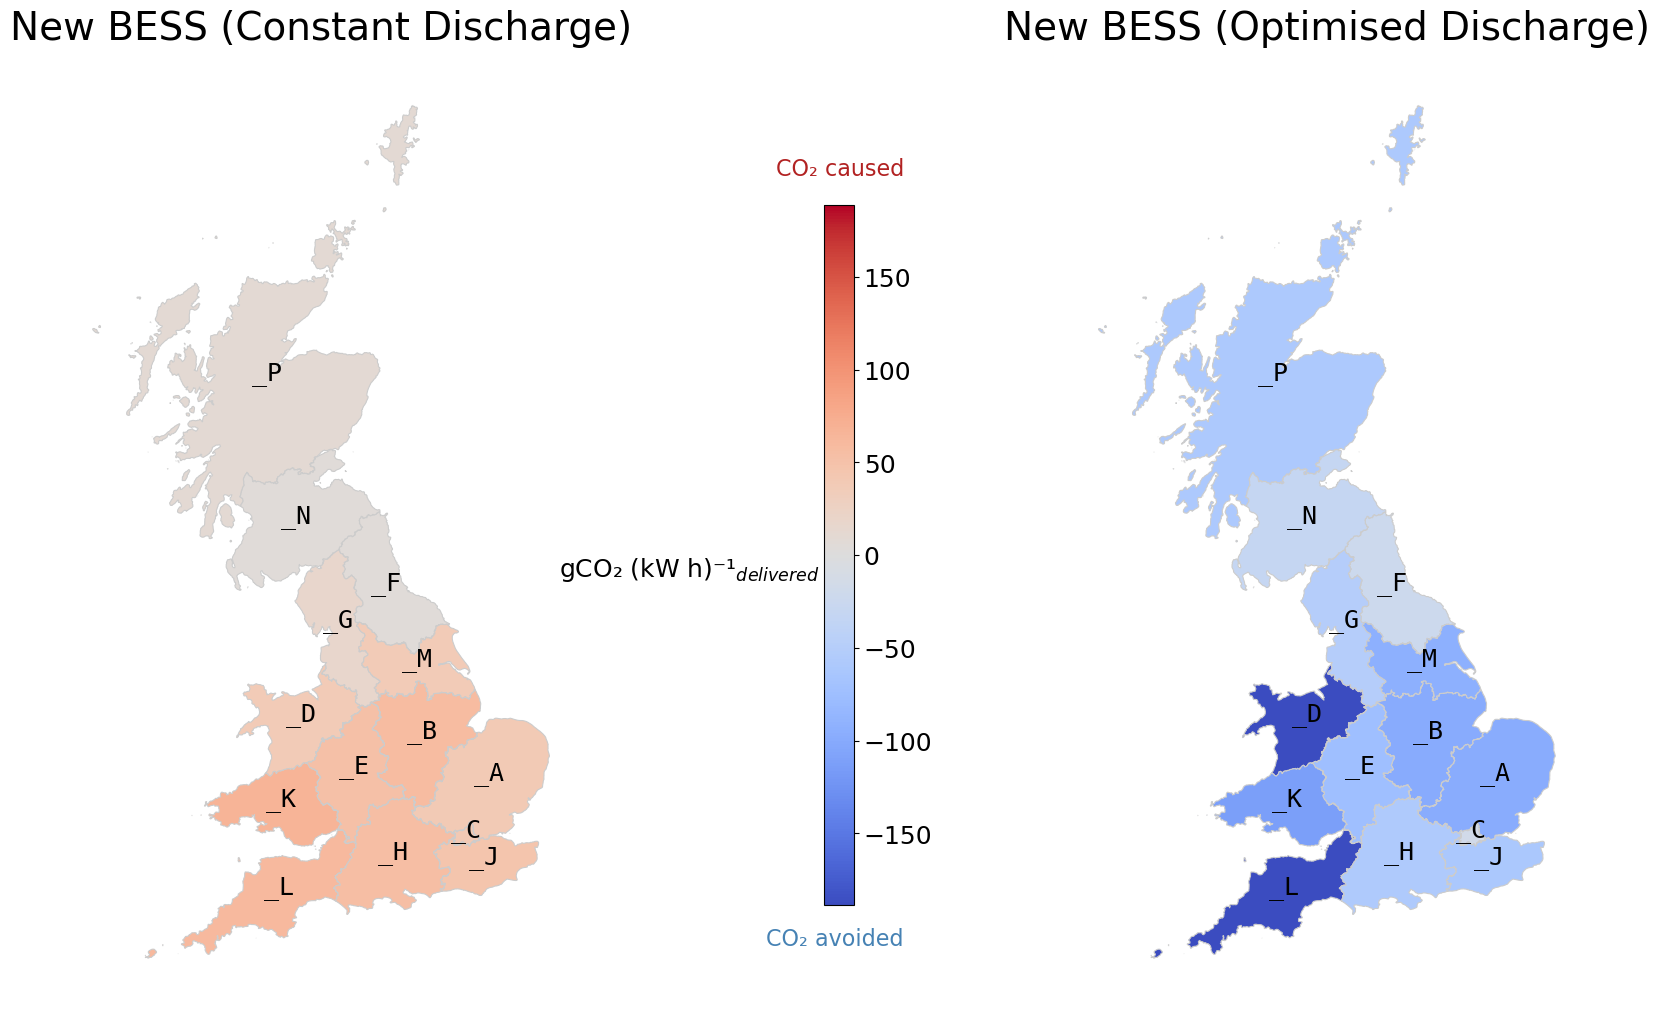

In [24]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib.cm import ScalarMappable

# === PATHS ===
shapefile_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\GB Shape File\dno_license_areas_20200506\DNO_License_Areas_20200506.shp"
csv_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\Region Shape Chart Data.csv"

# === LOAD SHAPEFILE AND CSV ===
gdf = gpd.read_file(shapefile_path)
df_emissions = pd.read_csv(csv_path)

# Check required columns
required_cols = ['Name', 'CI New Const', 'CI New Opt']
for col in required_cols:
    assert col in df_emissions.columns, f"'{col}' column not found in CSV"

# === MERGE ON 'Name' ===
gdf_merged = gdf.merge(df_emissions[['Name', 'CI New Const', 'CI New Opt']], on='Name', how='left')

# === DETERMINE SHARED COLOR SCALE CENTERED ON ZERO ===
vmin = min(gdf_merged['CI New Opt'].min(), gdf_merged['CI New Const'].min())
vmax = max(gdf_merged['CI New Opt'].max(), gdf_merged['CI New Const'].max())
abs_max = max(abs(vmin), abs(vmax))  # Symmetric scale
norm = TwoSlopeNorm(vmin=-abs_max, vcenter=0, vmax=abs_max)
cmap = 'coolwarm'

# === CREATE SUBPLOTS with constrained layout ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)

# === PLOT 1: CI Existing Ave ===
gdf_merged.plot(
    column='CI New Const',
    cmap=cmap,
    linewidth=0.8,
    edgecolor='0.8',
    norm=norm,
    ax=ax1,
    missing_kwds={"color": "darkgrey", "label": "Missing data"}
)
ax1.set_title('New BESS (Constant Discharge)', fontsize=28)
ax1.axis('off')
for idx, row in gdf_merged.iterrows():
    if pd.notnull(row['CI New Const']):
        centroid = row['geometry'].centroid
        ax1.text(centroid.x, centroid.y, row['Name'], fontsize=18, ha='center', fontfamily='monospace')

# === PLOT 2: CI Existing TV ===
gdf_merged.plot(
    column='CI New Opt',
    cmap=cmap,
    linewidth=0.8,
    edgecolor='0.8',
    norm=norm,
    ax=ax2,
    missing_kwds={"color": "darkgrey", "label": "Missing data"}
)
ax2.set_title('New BESS (Optimised Discharge)', fontsize=28)
ax2.axis('off')
for idx, row in gdf_merged.iterrows():
    if pd.notnull(row['CI New Opt']):
        centroid = row['geometry'].centroid
        ax2.text(centroid.x, centroid.y, row['Name'], fontsize=18, ha='center', fontfamily='monospace')

# === CREATE SHARED COLORBAR BETWEEN THE TWO MAPS ===
sm = ScalarMappable(norm=norm, cmap=cmap)
sm._A = []

# Define manual position [left, bottom, width, height]
# Try adjusting 'left' and 'width' to better fit your spacing
cbar_ax = fig.add_axes([0.5, 0.1, 0.015, 0.7])  # Centered between the subplots

cbar = fig.colorbar(
    sm,
    cax=cbar_ax,
    orientation='vertical'
)
cbar.ax.tick_params(labelsize=18)
cbar.set_label("gCO₂ (kW h)⁻¹$_{delivered}$", fontsize=18, rotation=0, labelpad=-175)

# === ADD ANNOTATED LABELS NEXT TO COLORBAR ===
fig.text(0.54, 0.06, "CO₂ avoided", fontsize=16, ha='right', color='steelblue', rotation=0)
fig.text(0.54, 0.83, "CO₂ caused", fontsize=16, ha='right', color='firebrick', rotation=0)

# === DONE ===
plt.show()


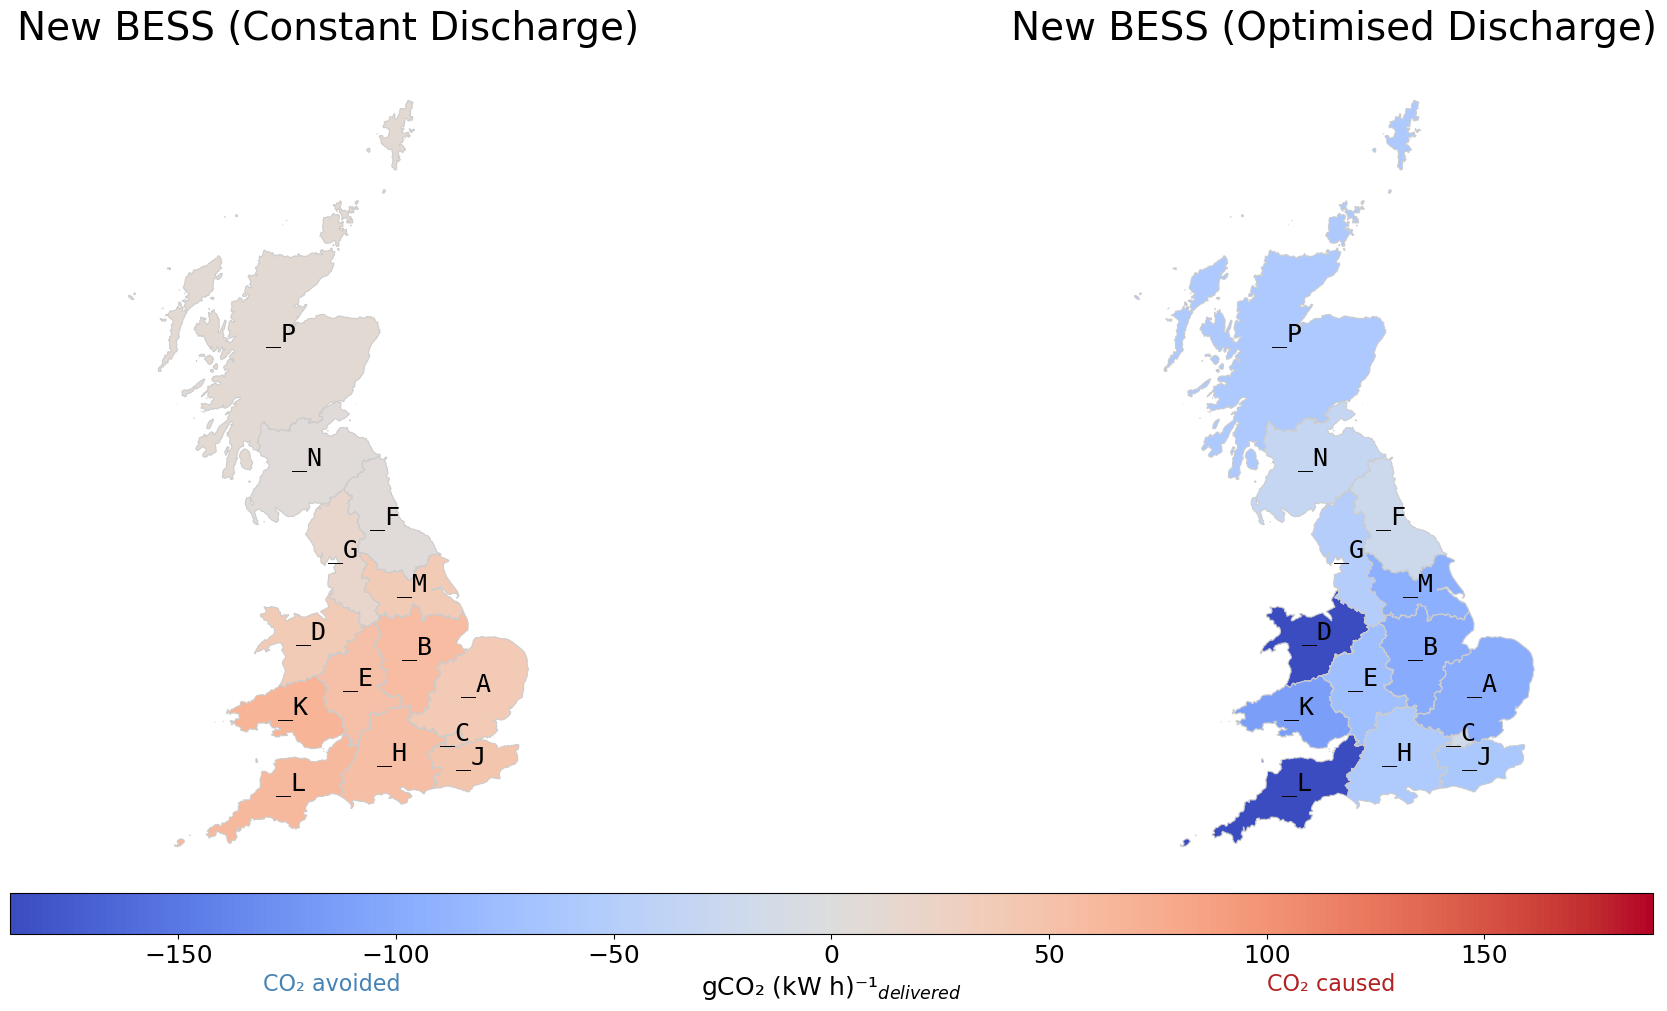

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib.cm import ScalarMappable

# === PATHS ===
shapefile_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\GB Shape File\dno_license_areas_20200506\DNO_License_Areas_20200506.shp"
csv_path = r"C:\Users\spice\Dropbox\Documents\Imperial 2024.2025\MECH70038 - Research Projects\_My Thesis\Data\Region Shape Chart Data.csv"

# === LOAD SHAPEFILE AND CSV ===
gdf = gpd.read_file(shapefile_path)
df_emissions = pd.read_csv(csv_path)

# Check required columns
required_cols = ['Name', 'CI New Const', 'CI New Opt']
for col in required_cols:
    assert col in df_emissions.columns, f"'{col}' column not found in CSV"

# === MERGE ON 'Name' ===
gdf_merged = gdf.merge(df_emissions[['Name', 'CI New Const', 'CI New Opt']], on='Name', how='left')

# === DETERMINE SHARED COLOR SCALE CENTERED ON ZERO ===
vmin = min(gdf_merged['CI New Opt'].min(), gdf_merged['CI New Const'].min())
vmax = max(gdf_merged['CI New Opt'].max(), gdf_merged['CI New Const'].max())
abs_max = max(abs(vmin), abs(vmax))  # Symmetric scale
norm = TwoSlopeNorm(vmin=-abs_max, vcenter=0, vmax=abs_max)
cmap = 'coolwarm'

# === CREATE SUBPLOTS with constrained layout ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)

# === PLOT 1: CI Existing Ave ===
gdf_merged.plot(
    column='CI New Const',
    cmap=cmap,
    linewidth=0.8,
    edgecolor='0.8',
    norm=norm,
    ax=ax1,
    missing_kwds={"color": "darkgrey", "label": "Missing data"}
)
ax1.set_title('New BESS (Constant Discharge)', fontsize=28)
ax1.axis('off')
for idx, row in gdf_merged.iterrows():
    if pd.notnull(row['CI New Const']):
        centroid = row['geometry'].centroid
        ax1.text(centroid.x, centroid.y, row['Name'], fontsize=18, ha='center', fontfamily='monospace')

# === PLOT 2: CI Existing TV ===
gdf_merged.plot(
    column='CI New Opt',
    cmap=cmap,
    linewidth=0.8,
    edgecolor='0.8',
    norm=norm,
    ax=ax2,
    missing_kwds={"color": "darkgrey", "label": "Missing data"}
)
ax2.set_title('New BESS (Optimised Discharge)', fontsize=28)
ax2.axis('off')
for idx, row in gdf_merged.iterrows():
    if pd.notnull(row['CI New Opt']):
        centroid = row['geometry'].centroid
        ax2.text(centroid.x, centroid.y, row['Name'], fontsize=18, ha='center', fontfamily='monospace')

# === CREATE SHARED COLORBAR BELOW ===
sm = ScalarMappable(norm=norm, cmap=cmap)
sm._A = []
cbar = fig.colorbar(
    sm,
    ax=[ax1, ax2],
    orientation='horizontal',
    fraction=0.05,
    pad=0.01,
    aspect=40
)
cbar.ax.tick_params(labelsize=18)
cbar.set_label("gCO₂ (kW h)⁻¹$_{delivered}$", fontsize=18)

# === ADD ANNOTATED LABELS BELOW COLORBAR ===
fig.text(0.25, 0.015, "CO₂ avoided", fontsize=16, ha='center', color='steelblue')
fig.text(0.75, 0.015, "CO₂ caused", fontsize=16, ha='center', color='firebrick')

# === DONE ===
plt.show()
